## Task-D: Collinear features and their effect on linear models

In [122]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [123]:
df = pd.read_csv('task_d.csv')

In [124]:
df

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0
...,...,...,...,...,...,...,...,...
95,0.358663,-0.207835,0.928390,0.300024,-0.207835,0.382111,1.716476,1
96,0.358663,-0.417770,0.928390,0.300024,-0.417770,0.382111,1.841269,1
97,1.141771,-0.417770,0.997724,1.130131,-0.417770,1.137586,0.019860,1
98,-0.581066,-1.257507,0.096375,-0.604025,-1.257507,-0.531992,0.590582,1


In [125]:
X = df.drop(['target'], axis=1).values
Y = df['target'].values

In [126]:
df.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


<AxesSubplot:>

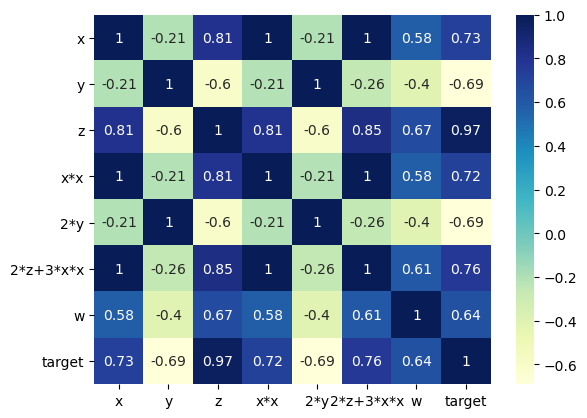

In [127]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

logistic regession

In [128]:
alpha = np.logspace(-10,10,10)
print(alpha)
param_grid = {'C':alpha}
logr = LogisticRegression()

[1.00000000e-10 1.66810054e-08 2.78255940e-06 4.64158883e-04
 7.74263683e-02 1.29154967e+01 2.15443469e+03 3.59381366e+05
 5.99484250e+07 1.00000000e+10]


In [129]:
logr = GridSearchCV(logr,param_grid,cv=4) 

logr.fit(X,Y)
 




GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.66810054e-08, 2.78255940e-06, 4.64158883e-04,
       7.74263683e-02, 1.29154967e+01, 2.15443469e+03, 3.59381366e+05,
       5.99484250e+07, 1.00000000e+10])})

In [130]:
logr.best_params_

{'C': 0.07742636826811278}

In [131]:
best_model = LogisticRegression(C = 0.07742636826811278 ) 

In [132]:
best_model.fit(X,Y)

LogisticRegression(C=0.07742636826811278)

In [133]:
w = best_model.coef_
w

array([[ 0.38300052, -0.47414873,  0.70958185,  0.36610951, -0.47414873,
         0.41517131,  0.32495883]])

In [134]:
best_model.intercept_

array([0.120268])

In [135]:
predict = best_model.predict(X)

In [136]:
accuracy = accuracy_score(Y,predict)
print(accuracy)

1.0


In [ ]:
noise_model = LogisticRegression(C = 0.07742636826811278 ) 

In [138]:
noise_model = LogisticRegression(C = 0.07742636826811278 ) 

In [139]:
noise_model.fit(X_noise,Y)

LogisticRegression(C=0.07742636826811278)

In [140]:
predict1 = best_model.predict(X_noise)

In [141]:
accuracy1 = accuracy_score(Y,predict1)
print(accuracy)

1.0


In [142]:
w_n =noise_model.coef_
w_n

array([[ 0.38300073, -0.47414848,  0.70958178,  0.36610974, -0.47414848,
         0.41517151,  0.32495749]])

5.  Checking deviations in metric and weights 

In [143]:
acc = (accuracy1-accuracy)
acc

0.0

In [144]:
diff= abs(w_n-w)
diff

array([[2.06641000e-07, 2.51589285e-07, 6.78039583e-08, 2.25932434e-07,
        2.51589285e-07, 2.01705904e-07, 1.33596690e-06]])

In [145]:
diff_per= abs((diff/w) *100)
diff_per

array([[5.39531900e-05, 5.30612591e-05, 9.55548097e-06, 6.17117081e-05,
        5.30612591e-05, 4.85837776e-05, 4.11118821e-04]])

In [197]:
column= df.columns
print('Top 4 features which have higher percentage change in weights is',column[[6,3,0,1]].values.tolist())

Top 4 features which have higher percentage change in weights is ['w', 'x*x', 'x', 'y']


SVM

In [185]:
param_grid = {'C':[0.01,0.05,0.1,10,100]}
svm = SVC()

In [186]:
svm = GridSearchCV(svm,param_grid,cv=4) 

svm.fit(X,Y)
 


GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 10, 100]})

In [187]:
svm.best_params_

{'C': 0.05}

In [198]:
best_models =SVC(C = 0.05,kernel='linear') 
best_models.fit(X,Y)
ws = best_models.coef_
print(ws)

predicts = best_models.predict(X)
accuracy2 = accuracy_score(Y,predicts)
print(accuracy2)

[[ 0.17435937 -0.2696266   0.56787483  0.16023232 -0.2696266   0.21277134
   0.13810725]]
1.0


In [199]:
X_noise = X + 0.01
noise_models = SVC(C = 0.05,kernel='linear') 
noise_models.fit(X_noise,Y)
predicts1 = noise_models.predict(X_noise)
accuracy3 = accuracy_score(Y,predicts1)
print(accuracy3)
w_ns =noise_models.coef_
w_ns

1.0


array([[ 0.17435937, -0.2696266 ,  0.56787484,  0.16023233, -0.2696266 ,
         0.21277134,  0.13810725]])

In [202]:
acc = (accuracy2-accuracy3)
diffs= abs(w_ns-ws)
print(diffs)
diff_pers= abs((diffs/ws)*100)
print(diff_pers)
column= df.columns
print('Top 4 features which have higher percentage change in weights is',column[[6,2,5,1]].values.tolist())

[[8.52139082e-10 1.52293522e-09 3.52083296e-09 8.88099844e-10
  1.52293522e-09 1.22437588e-09 1.84737281e-09]]
[[4.88725719e-07 5.64831219e-07 6.20001582e-07 5.54257605e-07
  5.64831219e-07 5.75442116e-07 1.33763637e-06]]
Top 4 features which have higher percentage change in weights is ['w', 'z', '2*z+3*x*x', 'y']


### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>